In [1]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras import callbacks

Using TensorFlow backend.


In [2]:
import os
from PIL import Image
import numpy as np


In [3]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [4]:
path_FI = r'D:\Triage\Bayesian_Network\NetworkM\CNN\data\Finalset\coif8'
train_dir = os.path.join(path_FI, 'train')
test_dir = os.path.join(path_FI, 'test')

In [5]:
width = height = 100

In [6]:
os.listdir(train_dir)

['gravel',
 'M1(gravel+sand)',
 'M2(sand+silicarock)',
 'M3(gravel+silicarock)',
 'regolith',
 'sand',
 'silicarock']

In [7]:
Materials = {'gravel':0, 'M1(gravel+sand)':1,'M2(sand+silicarock)':2, 'M3(gravel+silicarock)':3, 'regolith':5, 'sand':4, 'silicarock':6}

def DataSet(material_path):
    images = []
    labels = []
    material_list = os.listdir(material_path)
    for material in material_list:
        material_dir = os.path.join(material_path, material)
        list_img = os.listdir(material_dir)
        for img_name in list_img:
            img_path = os.path.join(material_dir, img_name)
            img = Image.open(img_path)
            img = img.resize((width, height),Image.ANTIALIAS)
            images.append(np.array(img))
            labels.append(Materials[material])
    return images, labels

In [8]:
x_train, y_train =  DataSet(train_dir)
x_test, y_test =  DataSet(test_dir)

In [9]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x_train, y_train , test_size=0.3, random_state=1)

In [10]:
(train_images, train_labels), (test_images, test_labels) = (np.array(x_train), np.array(y_train)), (np.array(x_test), np.array(y_test))

In [11]:
tf.get_logger().setLevel('ERROR')
# 下面进行数据集预处理，将像素的值标准化至0到1的区间内：
train_images, test_images = train_images / 255.0, test_images / 255.0

In [12]:
from keras.models import Model, Input
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Average, Dropout, Flatten
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy, SparseCategoricalCrossentropy
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.optimizers import Adam
# from keras.datasets import cifar10
from keras.layers import Dense, LSTM, GRU, SimpleRNN
from keras import layers
import numpy as np
from tensorflow.keras.utils import plot_model


In [35]:
def ConvPool(x, i):
    x = Conv2D(64, (3, 3), name = "conv1_"+str(i),activation='relu')(x)
    x = Conv2D(64, (3, 3), name = "conv2_"+str(i),activation='relu')(x)
    x = MaxPooling2D((2, 2), name = "mp_"+str(i))(x)
    return x

In [39]:
def OurModule():
    inputs = Input(shape=(width, height, 3))
    x = Conv2D(32, (3, 3), name = "conv1", activation='relu')(inputs)
    x = MaxPooling2D((2, 2), name = "mp1")(x)
    
    for i in range(3):
        x = ConvPool(x, i)
        
    
    output = Flatten()(x)
    output = Dense(64, name = "Dense1", activation='relu')(output)
    output = Dense(7, name = "Dense2", activation='softmax')(output)
    
    model = Model(inputs=inputs, outputs=output)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics = ['accuracy'])
    model.build((width, height, 3))
    
    return model

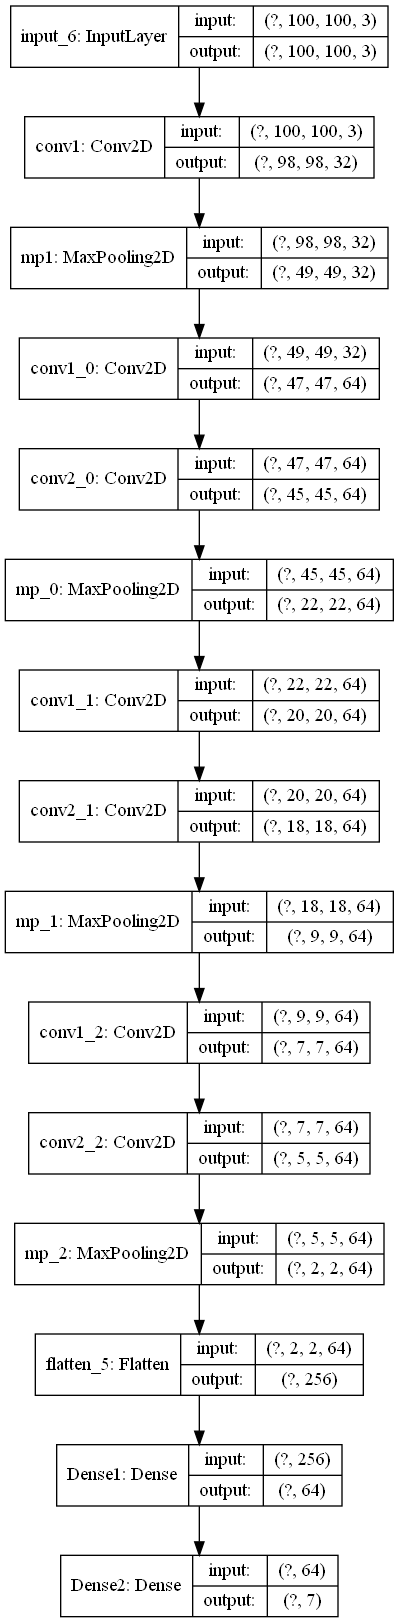

In [40]:
model = OurModule()
# plot_model(model, to_file='./model.png', show_shapes=True)
plot_model(model, show_shapes = True)

In [38]:
# 训练模型
# model = InceptionModule()
filepath=r"./weights/MyOwn/checkpoint-val_acc{val_accuracy:.4f}-{epoch:02d}.hdf5"
checkpoint  = callbacks.ModelCheckpoint(filepath, verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')


import time
start = time.perf_counter()

history = model.fit(train_images,
                    train_labels,
                    batch_size= 16,
                    epochs=200, 
                    
#                     validation_split =0.3
                    validation_data=(test_images, test_labels),
                    callbacks = [checkpoint],
                   )
end = time.perf_counter()
print("总耗时为: %.4f s" % ((end - start))) 

Train on 2601 samples, validate on 1116 samples
Epoch 1/200
2601/2601 [==============================] - 2s 903us/step - loss: 1.9468 - accuracy: 0.1480 - val_loss: 1.9432 - val_accuracy: 0.1514

Epoch 00001: val_accuracy improved from -inf to 0.15143, saving model to ./weights/MyOwn/checkpoint-val_acc0.1514-01.hdf5
Epoch 2/200
2601/2601 [==============================] - 1s 553us/step - loss: 1.6414 - accuracy: 0.3210 - val_loss: 1.2553 - val_accuracy: 0.4651

Epoch 00002: val_accuracy improved from 0.15143 to 0.46505, saving model to ./weights/MyOwn/checkpoint-val_acc0.4651-02.hdf5
Epoch 3/200
2601/2601 [==============================] - 1s 554us/step - loss: 1.2041 - accuracy: 0.5063 - val_loss: 1.0568 - val_accuracy: 0.5618

Epoch 00003: val_accuracy improved from 0.46505 to 0.56183, saving model to ./weights/MyOwn/checkpoint-val_acc0.5618-03.hdf5
Epoch 4/200
2601/2601 [==============================] - 1s 553us/step - loss: 1.0822 - accuracy: 0.5552 - val_loss: 0.9815 - val_accura


Epoch 00036: val_accuracy did not improve from 0.76075
Epoch 37/200
2601/2601 [==============================] - 1s 564us/step - loss: 0.2709 - accuracy: 0.8943 - val_loss: 0.9448 - val_accuracy: 0.7222

Epoch 00037: val_accuracy did not improve from 0.76075
Epoch 38/200
2601/2601 [==============================] - 1s 568us/step - loss: 0.2357 - accuracy: 0.9104 - val_loss: 0.9765 - val_accuracy: 0.7419

Epoch 00038: val_accuracy did not improve from 0.76075
Epoch 39/200
2601/2601 [==============================] - 1s 559us/step - loss: 0.2161 - accuracy: 0.9204 - val_loss: 0.9587 - val_accuracy: 0.7679

Epoch 00039: val_accuracy improved from 0.76075 to 0.76792, saving model to ./weights/MyOwn/checkpoint-val_acc0.7679-39.hdf5
Epoch 40/200
2601/2601 [==============================] - 1s 560us/step - loss: 0.2353 - accuracy: 0.9054 - val_loss: 1.0415 - val_accuracy: 0.7634

Epoch 00040: val_accuracy did not improve from 0.76792
Epoch 41/200
2601/2601 [==============================] - 


Epoch 00115: val_accuracy did not improve from 0.77867
Epoch 116/200
2601/2601 [==============================] - 1s 568us/step - loss: 9.0793e-06 - accuracy: 1.0000 - val_loss: 2.9983 - val_accuracy: 0.7661

Epoch 00116: val_accuracy did not improve from 0.77867
Epoch 117/200
2601/2601 [==============================] - 1s 567us/step - loss: 8.0653e-06 - accuracy: 1.0000 - val_loss: 3.0241 - val_accuracy: 0.7661

Epoch 00117: val_accuracy did not improve from 0.77867
Epoch 118/200
2601/2601 [==============================] - 1s 566us/step - loss: 7.4862e-06 - accuracy: 1.0000 - val_loss: 3.0295 - val_accuracy: 0.7643

Epoch 00118: val_accuracy did not improve from 0.77867
Epoch 119/200
2601/2601 [==============================] - 1s 555us/step - loss: 7.0805e-06 - accuracy: 1.0000 - val_loss: 3.0720 - val_accuracy: 0.7661

Epoch 00119: val_accuracy did not improve from 0.77867
Epoch 120/200
2601/2601 [==============================] - 1s 553us/step - loss: 6.2770e-06 - accuracy: 1.00

2601/2601 [==============================] - 1s 553us/step - loss: 2.6830e-07 - accuracy: 1.0000 - val_loss: 3.8403 - val_accuracy: 0.7679

Epoch 00155: val_accuracy did not improve from 0.77867
Epoch 156/200
2601/2601 [==============================] - 1s 554us/step - loss: 2.2004e-07 - accuracy: 1.0000 - val_loss: 3.8556 - val_accuracy: 0.7697

Epoch 00156: val_accuracy did not improve from 0.77867
Epoch 157/200
2601/2601 [==============================] - 1s 552us/step - loss: 2.0230e-07 - accuracy: 1.0000 - val_loss: 3.8821 - val_accuracy: 0.7688

Epoch 00157: val_accuracy did not improve from 0.77867
Epoch 158/200
2601/2601 [==============================] - 1s 551us/step - loss: 1.7998e-07 - accuracy: 1.0000 - val_loss: 3.9013 - val_accuracy: 0.7697

Epoch 00158: val_accuracy did not improve from 0.77867
Epoch 159/200
2601/2601 [==============================] - 1s 554us/step - loss: 1.6596e-07 - accuracy: 1.0000 - val_loss: 3.9159 - val_accuracy: 0.7688

Epoch 00159: val_accurac

In [16]:
saved_weight=r'./weights/MyOwn/checkpoint-val_acc0.7984-75.hdf5'

In [18]:
# 评估模型,不输出预测结果
model.load_weights(saved_weight)
loss,accuracy = model.evaluate(test_images, test_labels, verbose=2, batch_size=8)
print('\ntest loss',loss)
print('accuracy',accuracy)


test loss 1.4640510929112096
accuracy 0.7983871102333069


In [20]:
y_probs = model.predict(test_images)
y_pred= np.argmax(y_probs,axis=1)
y_true = test_labels

In [21]:
from sklearn import metrics

y_test    = test_labels
y_predict = y_pred
 
print('准确率:', metrics.accuracy_score(y_test, y_predict)) #预测准确率输出
 
print('宏平均精确率:',metrics.precision_score(y_test,y_predict,average='macro')) #预测宏平均精确率输出
print('微平均精确率:', metrics.precision_score(y_test, y_predict, average='micro')) #预测微平均精确率输出
print('加权平均精确率:', metrics.precision_score(y_test, y_predict, average='weighted')) #预测加权平均精确率输出
 
print('宏平均召回率:',metrics.recall_score(y_test,y_predict,average='macro'))#预测宏平均召回率输出
print('微平均召回率:',metrics.recall_score(y_test,y_predict,average='micro'))#预测微平均召回率输出
print('加权平均召回率:',metrics.recall_score(y_test,y_predict,average='micro'))#预测加权平均召回率输出
 
print('宏平均F1-score:',metrics.f1_score(y_test,y_predict,  labels=[0, 1,2,3,4,5,6],average='macro'))#预测宏平均f1-score输出
print('微平均F1-score:',metrics.f1_score(y_test,y_predict,  labels=[0, 1,2,3,4,5,6],average='micro'))#预测微平均f1-score输出
print('加权平均F1-score:',metrics.f1_score(y_test,y_predict,labels=[0, 1,2,3,4,5,6],average='weighted'))#预测加权平均f1-score输出
 
print('混淆矩阵输出:\n',metrics.confusion_matrix(y_test,y_predict))#混淆矩阵输出
print('分类报告:\n', metrics.classification_report(y_test, y_predict))#分类报告输出


准确率: 0.7983870967741935
宏平均精确率: 0.7957879705170009
微平均精确率: 0.7983870967741935
加权平均精确率: 0.7996273790284607
宏平均召回率: 0.7964877179803524
微平均召回率: 0.7983870967741935
加权平均召回率: 0.7983870967741935
宏平均F1-score: 0.7956069687460093
微平均F1-score: 0.7983870967741935
加权平均F1-score: 0.798494972694238
混淆矩阵输出:
 [[132   0   1  22   1   1   0]
 [  1 163   1   0   8   3   0]
 [  2   3  99  15   2  16  12]
 [ 18   0  11 119   1   1  26]
 [  1  13   6   1 148   0   0]
 [  1   5  21   2   1 122   2]
 [  0   0  15   7   0   5 108]]
分类报告:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       157
           1       0.89      0.93      0.91       176
           2       0.64      0.66      0.65       149
           3       0.72      0.68      0.70       176
           4       0.92      0.88      0.90       169
           5       0.82      0.79      0.81       154
           6       0.73      0.80      0.76       135

    accuracy                           0.80     

### ROC 曲线

In [22]:
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [23]:
Y_test = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = Y_test.shape[1]

In [24]:
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_probs[:, i])   
    #Y_test样例真实标签，y_score学习器预测的样例的概率 
    roc_auc[i] = auc(fpr[i], tpr[i])   
    #计算ROC曲线下方的面积，fpr假正例率数组(横坐标)，tpr真正例率数组(纵坐标）


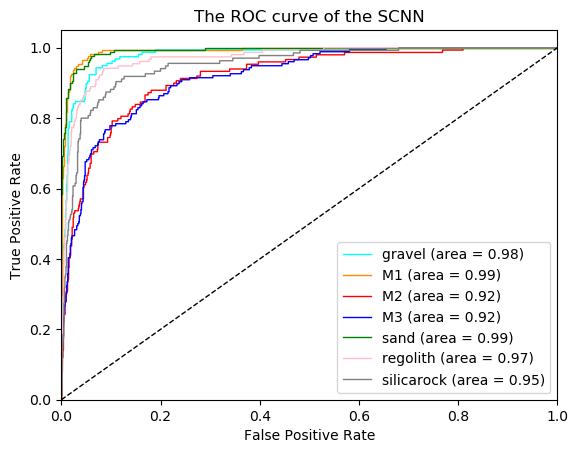

In [26]:
# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
lw=1
plt.figure()

colors = cycle(['aqua', 'darkorange', 'r', 'b', 'g', 'pink', 'gray'])
material = ['gravel', 'M1', 'M2', 'M3', 'sand', 'regolith', 'silicarock']
Score_ = []
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(material[i], roc_auc[i]))
    Score_.append(roc_auc[i])
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The ROC curve of the SCNN')#SCNN
plt.legend(loc="lower right")
plt.savefig(r'./Visualization/ROC/SCNN.png', bbox_inches='tight', transparent=True, dpi=200)
plt.show()


### 3

In [70]:
(history.history).keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

测试集的准确度 0.7105734944343567


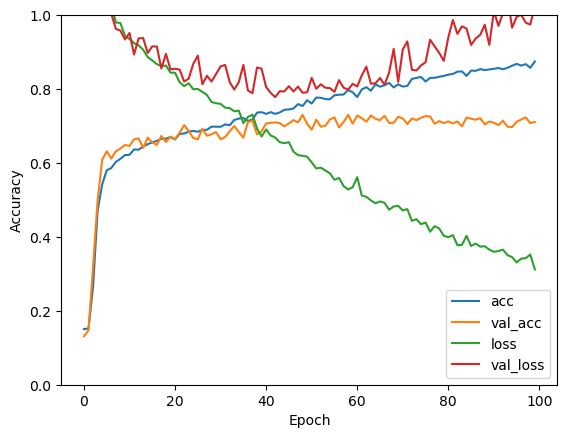

In [71]:
# 评估模型
plt.plot(history.history['accuracy'], label='acc')#sparse_categorical_accuracy
plt.plot(history.history['val_accuracy'], label = 'val_acc')#val_sparse_categorical_accuracy
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("测试集的准确度", test_acc)
plt.savefig("./data/1"+'/'+'Inception_71.057.png', bbox_inches = 'tight')
plt.show()

In [12]:
#权重参数
from sklearn.metrics import confusion_matrix

In [13]:
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [33]:
Name = {0: 'gravel', 1:'M1(gravel+sand)',2:'M2(sand+silica)', 3:'M3(gravel+silica)', 4:'regolith', 5:'sand', 6:'silicarock'}

material = 'gravel'
for i in range(10):
    file_path = r'D:\Triage\Bayesian_Network\NetworkM\CNN\data\FusionImages\\'+'test'+'/'+material+'/'+material+str(i+1)+ '.jpg'
    img_pred = Image.open(file_path)
    img_pred = img_pred.resize((width, height),Image.ANTIALIAS)
    x = np.array(img_pred)
    
    X = []
    X.append(x)
    a = np.array(X)
#     a.shape
    
    y_pred = model.predict_classes(a)
    print(y_pred)
    print('识别的材料为：',Name[int(y_pred)])

[0]
识别的材料为： gravel
[5]
识别的材料为： sand
[5]
识别的材料为： sand
[0]
识别的材料为： gravel
[3]
识别的材料为： M3(gravel+silica)
[3]
识别的材料为： M3(gravel+silica)
[0]
识别的材料为： gravel
[0]
识别的材料为： gravel
[0]
识别的材料为： gravel
[5]
识别的材料为： sand


In [2]:
# a.shape

In [44]:
y_pred = []
y_true = []
for i in range(len(test_images)):
    x_test = test_images[i]
#     img_pred = Image.open(x_test)
#     img_pred = img_pred.resize((width, height),Image.ANTIALIAS)
    x = np.array(x_test)
    
    X = []
    X.append(x)
    a = np.array(X)
    y_p = model.predict_classes(a)
    y_pred.append(int(y_p))
    y_true.append(test_labels[i])


In [38]:
from collections import Counter
print('y_true:',Counter(y_true),'\n'*2, 'y_pred:',Counter(y_pred))

y_true: Counter({1: 176, 3: 176, 4: 169, 0: 157, 5: 154, 2: 149, 6: 135}) 

 y_pred: Counter({4: 183, 0: 182, 2: 165, 1: 163, 5: 154, 3: 144, 6: 125})


In [42]:
y_pred[-10:]

[6, 6, 6, 2, 6, 6, 6, 6, 6, 6]

In [40]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_true, y_pred))

[[132   2   2  11   3   7   0]
 [  2 132   5   1  28   8   0]
 [  3   3  76  15  15  21  16]
 [ 36   2  21  95   1   8  13]
 [  2  21  12   3 129   1   1]
 [  4   3  26   8   7 101   5]
 [  3   0  23  11   0   8  90]]


In [50]:
NAME_csv = 'CNN_4'

In [51]:
def plot_confusion_matrix(matrix, labels_name, title, cmap=plt.cm.Blues):#cmap='Blues'
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]    # 归一化
    plt.imshow(matrix, interpolation='nearest',cmap=cmap)    # 在特定的窗口上显示图像
    plt.title(NAME_csv, fontdict={'family': 'Times New Roman', 'size': 20, 'weight'  : "bold"})    # 图像标题
#     plt.colorbar()
    
    
    bwith = 3 #边框宽度设置为2
    ax = plt.gca()#获取边框
#     ax.spines['top'].set_color('red')  # 设置上‘脊梁’为红色
#     ax.spines['right'].set_color('none')  # 设置上‘脊梁’为无色
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=0)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    
    plt.tick_params(labelsize=10, width=1)
    
    plt.rcParams['font.sans-serif']=['Times New Roman'] # ['SimSun']宋体；['SimHei']黑体，有很多自己都可以设置
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.ylabel('True label', fontdict={'family': 'Times New Roman','weight' : "bold", 'size': 18})    
    plt.xlabel('Predicted label', fontdict={'family': 'Times New Roman', 'weight'  : "bold", 'size': 18})
    plt.tight_layout()
    
    

In [52]:
labels_name = ("Gravel", "M1", "M2", "M3", "Sand", "Regolith", "SilicaRock")
matrix = confusion_matrix(y_true, y_pred)

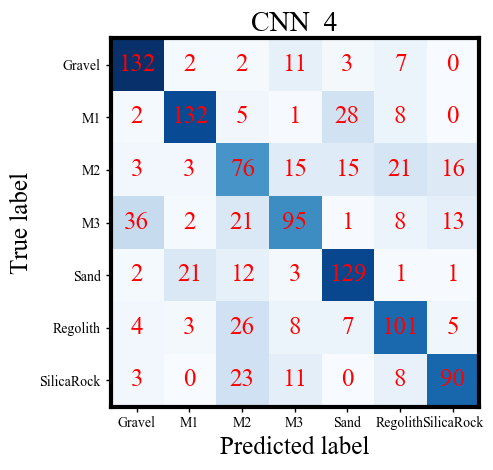

In [53]:
for i in range(len(matrix)):
    for j in range(len(matrix)):
        plt.annotate(matrix[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center',
                     weight = "bold", color = "r", fontsize=18, family = "Times New Roman")
plot_confusion_matrix(matrix, labels_name , "Confusion Matrix" )

plt.savefig(r'D:\Triage\Bayesian_Network\NetworkM\CNN\MatrixImage'+'/'+NAME_csv + '2.png', bbox_inches='tight' ,format='png',transparent=True, dpi=200)
plt.show()